In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Load the training data
train_data = pd.read_csv('train.csv')
X_train = train_data.drop('label', axis=1).values
Y_train = train_data['label'].values

In [18]:
# Determine the number of classes dynamically
NumClasses = train_data['label'].nunique()

In [19]:
# Ensure the number of features matches the input shape expected by the model
input_shape = X_train.shape[1]

In [20]:
# Load the testing data
test_data = pd.read_csv('test.csv')
X_test = test_data.values  # Use all columns in the testing data

In [21]:
# Normalize pixel values to be between 0 and 1
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [22]:
# Ensure the number of features matches the input shape expected by the model
if X_test.shape[1] != input_shape:
    raise ValueError(f"Number of features in testing data ({X_test.shape[1]}) does not match the expected input shape ({input_shape}).")

In [23]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)

In [9]:
# Split the training data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [10]:
# Model definition
model = Sequential()
model.add(Dense(128, input_shape=(input_shape,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(NumClasses, activation="softmax"))

In [11]:
sgd = SGD(0.01)
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=128)

Epoch 1/10


313/313 [==============================] - 5s 11ms/step - loss: 2.3002 - accuracy: 0.1475 - val_loss: 2.2809 - val_accuracy: 0.1853
Epoch 2/10
313/313 [==============================] - 3s 10ms/step - loss: 2.2711 - accuracy: 0.2071 - val_loss: 2.2615 - val_accuracy: 0.2224
Epoch 3/10
313/313 [==============================] - 3s 11ms/step - loss: 2.2501 - accuracy: 0.2341 - val_loss: 2.2389 - val_accuracy: 0.2563
Epoch 4/10
313/313 [==============================] - 3s 11ms/step - loss: 2.2265 - accuracy: 0.2537 - val_loss: 2.2140 - val_accuracy: 0.2488
Epoch 5/10
313/313 [==============================] - 3s 9ms/step - loss: 2.1995 - accuracy: 0.2627 - val_loss: 2.1851 - val_accuracy: 0.2592
Epoch 6/10
313/313 [==============================] - 3s 9ms/step - loss: 2.1701 - accuracy: 0.2678 - val_loss: 2.1550 - val_accuracy: 0.2722
Epoch 7/10
313/313 [==============================] - 3s 10ms/step - loss: 2.1398 - accuracy: 0.2739 - val_loss: 2.1260 - val_accuracy: 0.2779

In [14]:
# Evaluation
predictions = model.predict(X_val, batch_size=128)
print("Validation set performance:")
print(classification_report(Y_val.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 4ms/step
Validation set performance:
              precision    recall  f1-score   support

           0       0.34      0.41      0.37       973
           1       0.32      0.09      0.14       979
           2       0.20      0.12      0.15      1030
           3       0.35      0.02      0.04      1023
           4       0.19      0.51      0.27       933
           5       0.28      0.33      0.30      1015
           6       0.31      0.25      0.28       996
           7       0.26      0.07      0.10       994
           8       0.36      0.51      0.42      1017
           9       0.32      0.52      0.39      1040

    accuracy                           0.28     10000
   macro avg       0.29      0.28      0.25     10000
weighted avg       0.29      0.28      0.25     10000



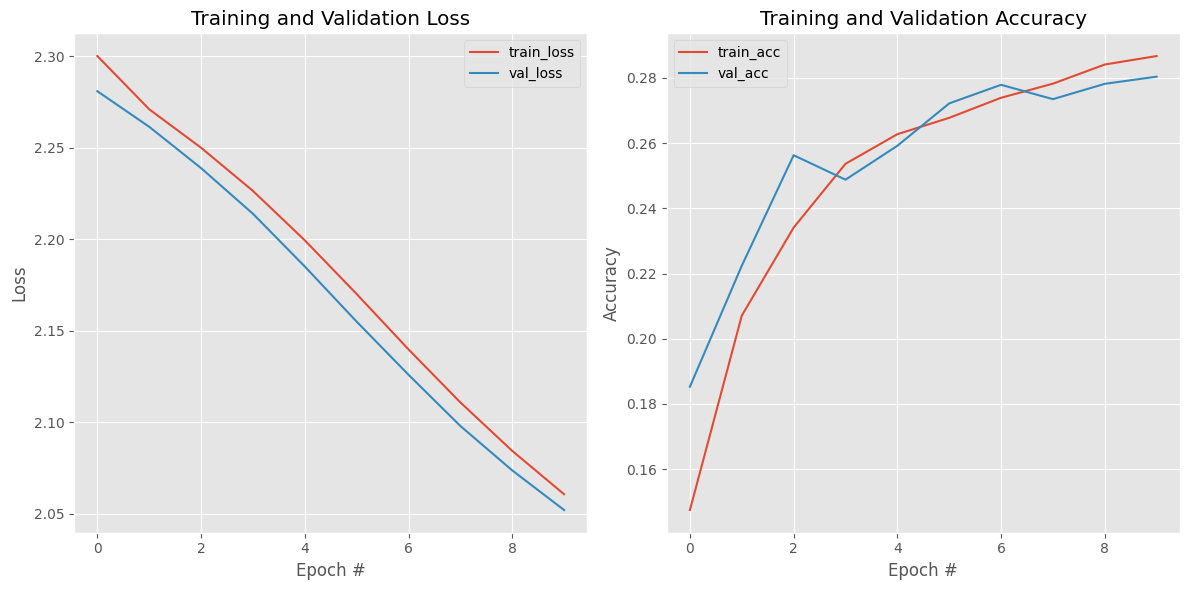

In [15]:
# Plotting
plt.style.use("ggplot")
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()